<a href="https://colab.research.google.com/github/gkmurphy/PUS2024_GMurphy/blob/ClassDemos/GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas
!pip install python3-rtree

ERROR: Could not find a version that satisfies the requirement python3-rtree (from versions: none)
ERROR: No matching distribution found for python3-rtree


In [8]:
#shapely - shapefiles and points
#fiona - input/output data reqs


import geopandas as gpd
import pandas as pd

#import natural earth vector
data = ("https://github.com/nvkelso/natural-earth-vector/raw/refs/heads/master/110m_cultural/ne_110m_admin_0_countries.shp")

In [13]:
world = gpd.read_file(data)

world.head()

world.iloc[0] #extract the first entry in the df
world.iloc[:,1] # extract the first col
world.columns


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

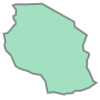

In [20]:
world.head()#geometry file is coming from shapely - e.g. .shp

world.iloc[1].loc["geometry"] #youre asking it to print geometry so it shows the shape of the obj

In [21]:
world.tail()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."
176,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29..."


In [26]:
world = world[["POP_EST", "CONTINENT", "ISO_A3", "geometry", "NAME", "GDP_MD"]]
world.head()

,POP_EST,CONTINENT,ISO_A3,geometry,NAME,GDP_MD
0,889953.0,Oceania,FJI,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,5496
1,58005463.0,Africa,TZA,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,63177
2,603253.0,Africa,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,907
3,37589262.0,North America,CAN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,1736425
4,328239523.0,North America,USA,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,21433226


In [27]:
world.crs #print the coordinate reference system

#projection causes distortion and it cannot be avoided ; coerced into 2-dimensional planes

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(35.597222222222214, 0.5, 'Latitude (degrees)')

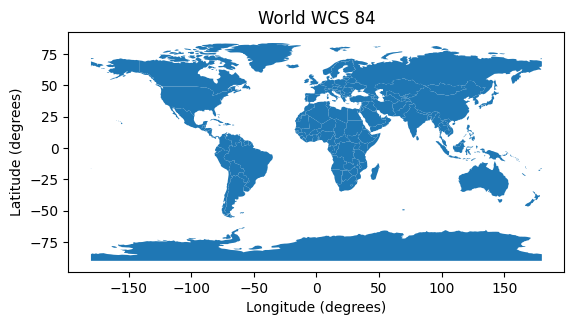

In [33]:
ax = world.plot()#returns an axis object so you can modify how it looks ; have to save it in a sep object
ax.set_title("World WCS 84")
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)")


<Axes: >

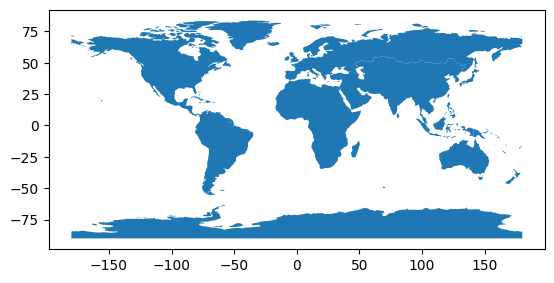

In [31]:
world.dissolve(by="CONTINENT").plot()#produce a df that only has shapes at the lvl of continent

#e.g. it doesn't show the countries anymore - dissolve to larger units.

<Axes: >

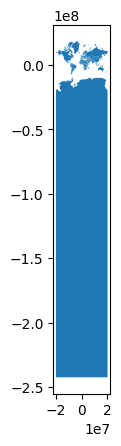

In [38]:
world.to_crs("EPSG:3395").plot() #eurocentric map minus the poles
#lol

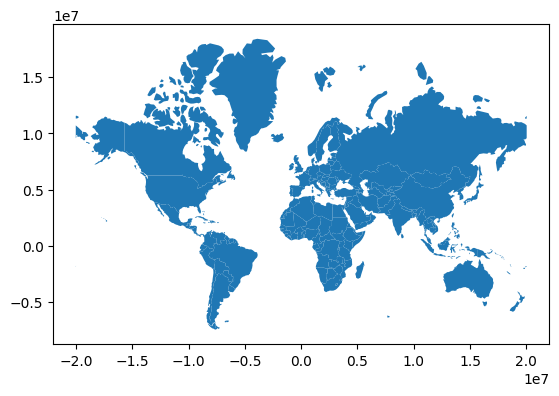

In [40]:
world_nopoles = world[(world.NAME != "Antarctica") & (world.NAME != "Fr. S. Antartica Lands")]
world_nopoles = world_nopoles.to_crs("EPSG:3395").plot()

<Axes: >

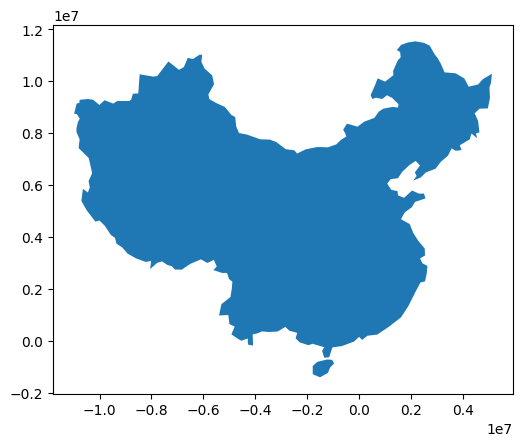

In [49]:
world_China = world[world.NAME == "China"]
world_China.to_crs("EPSG:3407").plot()

#This is better because the the crs is for HK neighborhoods and the area has been reduced to China

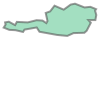

In [51]:
world[world.NAME == "Austria"]

world.set_index("NAME", inplace=True) #need to do this so the next part works with direct reference

world.loc["Austria", "geometry"] #again this is shapely working in the backend so errors are specific to it.

In [54]:
url = ("https://www2.census.gov/geo/tiger/TIGER2024/UAC20/tl_2024_us_uac20.zip")
cities = gpd.read_file(url)

cities.head()

#can use the census defined urban areas to consider whether or not an area is urban

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,14482,14482,400C200US14482,"Casper, WY","Casper, WY Urban Area",67,G3500,S,72213481,859632,+42.8391477,-106.3367071,"MULTIPOLYGON (((-106.27308 42.8288, -106.27308..."
1,81604,81604,400C200US81604,"Sheridan, WY","Sheridan, WY Urban Area",67,G3500,S,33638046,49823,+44.7865750,-106.9619773,"MULTIPOLYGON (((-106.95562 44.82931, -106.9554..."
2,18397,18397,400C200US18397,"Cody, WY","Cody, WY Urban Area",67,G3500,S,17893069,29888,+44.5246958,-109.0502125,"MULTIPOLYGON (((-109.05647 44.51664, -109.0569..."
3,89488,89488,400C200US89488,"Union, SC","Union, SC Urban Area",67,G3500,S,23763897,8766,+34.7247912,-081.6262933,"MULTIPOLYGON (((-81.59001 34.71101, -81.59056 ..."
4,01684,01684,400C200US01684,"Alpena, MI","Alpena, MI Urban Area",67,G3500,S,32911444,1992202,+45.0495900,-083.4535730,"MULTIPOLYGON (((-83.40797 45.06554, -83.40832 ..."


AttributeError: 'Axes' object has no attribute 'to_crs'

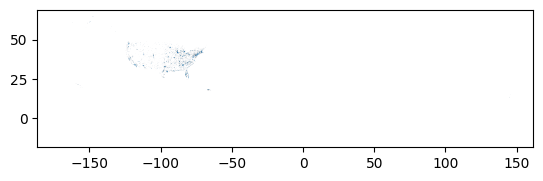

In [61]:
ax = world_nopoles.plot()
cities.plot().to_crs(world_nopoles.crs).plot(ax = ax, color="red")

In [58]:
# above doesn't work because theyre in different crs
cities.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands